In [1]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from utils import get_data, plot_cm, filter_columns

%matplotlib inline
pd.set_option('display.max_columns', 50)
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [2]:
XY_train, X_test_ori, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)

train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

y_train_ori = XY_train["TARGET_NUM"].values
x_train = XY_train[train_columns].values

min_max_scaler = MinMaxScaler(feature_range=(0, 10)).fit(x_train)
x_train = min_max_scaler.transform(x_train)

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1).fit(x_train)
x_train = imp.transform(x_train)

x_train = filter_columns(x_train)

result = [x_train]
for i in range(2, 5):
    result.append(np.power(x_train, i))
    
x_train = np.concatenate(result, axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_ori, test_size=0.3)

## LogisticRegression

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  6.6min finished


0.17654729572782235
0.17651976376014206


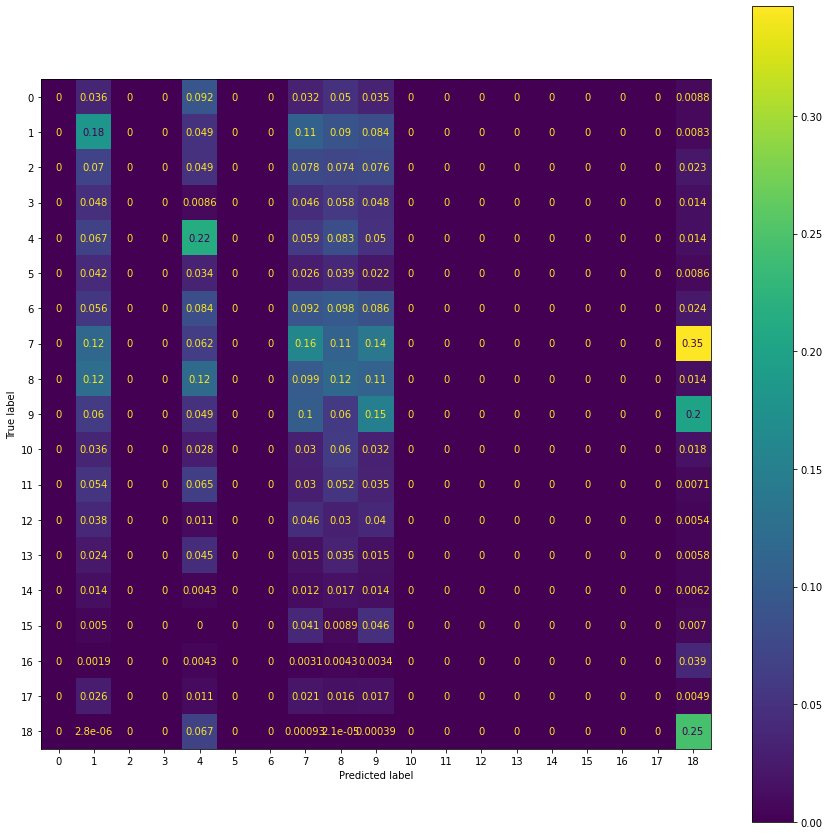

In [4]:
lr = LogisticRegression(random_state=42,
                         max_iter=100,
                         verbose=1,
                         n_jobs=10,
                         #class_weight="balanced"
                        ).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
plot_cm(lr, X_test, y_test)

## PassiveAggressiveClassifier

In [12]:
pac = PassiveAggressiveClassifier(max_iter=1000,
                                  random_state=42,
                                  verbose=1,
                                  n_jobs=4,
                                  class_weight="balanced",
                                  tol=1e-3).fit(X_train, y_train)
print(pac.score(X_train, y_train))
print(pac.score(X_test, y_test))
plot_cm(pac, X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 0.67, NNZs: 43, Bias: -0.837857, T: 2587371, Avg. loss: 0.253560
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 43, Bias: -1.521869, T: 2587371, Avg. loss: 0.250996
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 43, Bias: -1.406901, T: 2587371, Avg. loss: 0.401268
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 43, Bias: -0.560497, T: 2587371, Avg. loss: 0.284464
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.54, NNZs: 43, Bias: -1.002063, T: 5174742, Avg. loss: 0.253489
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 0.72, NNZs: 43, Bias: -1.438985, T: 5174742, Avg. loss: 0.250685
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 43, Bias: -1.385048, T: 5174742, Avg. loss: 0.400741
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.52, NNZs: 43, Bias: -0.554253, T: 5174742, Avg. loss: 0.284291
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.54, NNZs: 43

Norm: 1.21, NNZs: 43, Bias: 0.661364, T: 15524226, Avg. loss: 0.268137
Total training time: 3.95 seconds.
Convergence after 6 epochs took 3.95 seconds
-- Epoch 1
Norm: 0.84, NNZs: 43, Bias: -1.467954, T: 2587371, Avg. loss: 0.258788
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 43, Bias: 1.037090, T: 2587371, Avg. loss: 0.343209
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 43, Bias: -1.267605, T: 12936855, Avg. loss: 0.249463
Total training time: 3.57 seconds.
-- Epoch 6
Norm: 76.55, NNZs: 43, Bias: 45.718324, T: 2587371, Avg. loss: 7.660184
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.85, NNZs: 43, Bias: -1.448302, T: 5174742, Avg. loss: 0.258057
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 43, Bias: 0.975156, T: 5174742, Avg. loss: 0.345248
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.65, NNZs: 43, Bias: -1.234303, T: 15524226, Avg. loss: 0.249518
Total training time: 4.28 seconds.
Convergence after 6 epochs to

Norm: 74.73, NNZs: 43, Bias: 149.850081, T: 38810565, Avg. loss: 0.345048
Total training time: 8.88 seconds.
-- Epoch 16
Norm: 81.73, NNZs: 43, Bias: 153.002622, T: 41397936, Avg. loss: 0.366767
Total training time: 9.40 seconds.
-- Epoch 17
Norm: 80.37, NNZs: 43, Bias: 152.429912, T: 43985307, Avg. loss: 0.364931
Total training time: 9.92 seconds.
-- Epoch 18
Norm: 88.01, NNZs: 43, Bias: 156.996568, T: 46572678, Avg. loss: 0.364299
Total training time: 10.44 seconds.
Convergence after 18 epochs took 10.44 seconds


[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:   28.3s finished


## SGDClassifier

In [16]:
stand_scaler = StandardScaler()
X_train_stand = stand_scaler.fit(x_train_full_df[train_columns])
x_train_stand = X_train_stand.transform(x_train_full_df[train_columns])

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(x_train_stand,
                                                                    XY_train["TARGET_NUM"].values,
                                                                    test_size=0.30)

In [17]:
sgdc = SGDClassifier(max_iter=1000,
                     random_state=42,
                     verbose=1,
                     n_jobs=4,
                     class_weight="balanced",
                     tol=1e-3).fit(X_train_std, y_train_std)
print(pac.score(X_train, y_train))
print(pac.score(X_test, y_test))
plot_cm(pac, X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 0.12, NNZs: 43, Bias: -1.169174, T: 2587371, Avg. loss: 0.124476
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 43, Bias: -1.134008, T: 2587371, Avg. loss: 0.154769
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 43, Bias: -1.093260, T: 2587371, Avg. loss: 0.398446
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 43, Bias: -1.098704, T: 2587371, Avg. loss: 0.213443
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 43, Bias: -1.073898, T: 5174742, Avg. loss: 0.073705
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 43, Bias: -1.078710, T: 5174742, Avg. loss: 0.098101
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 43, Bias: -1.050328, T: 5174742, Avg. loss: 0.307162
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 43, Bias: -1.058911, T: 5174742, Avg. loss: 0.145468
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 43

Norm: 0.10, NNZs: 43, Bias: -1.124704, T: 5174742, Avg. loss: 0.166397
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 43, Bias: -1.015596, T: 18111597, Avg. loss: 0.278572
Total training time: 4.79 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 43, Bias: -1.014625, T: 23286339, Avg. loss: 0.131680
Total training time: 5.48 seconds.
Convergence after 9 epochs took 5.48 seconds
-- Epoch 1
Norm: 0.02, NNZs: 43, Bias: -1.033556, T: 7762113, Avg. loss: 0.227503
Total training time: 1.82 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 43, Bias: -1.079323, T: 7762113, Avg. loss: 0.163031
Total training time: 1.79 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 43, Bias: -1.016875, T: 20698968, Avg. loss: 0.278272
Total training time: 5.48 seconds.
-- Epoch 9
Norm: 0.12, NNZs: 43, Bias: -1.153852, T: 2587371, Avg. loss: 0.137855
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 43, Bias: -1.020100, T: 10349484, Avg. loss: 0.226178
Total training time: 2.42 seconds.
-- Epoch 5
Norm: 0.04, NNZ

Norm: 0.08, NNZs: 43, Bias: -1.122750, T: 5174742, Avg. loss: 0.051953
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 43, Bias: -1.036763, T: 20698968, Avg. loss: 0.027760
Total training time: 4.74 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 43, Bias: -1.456592, T: 7762113, Avg. loss: 0.031476
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 18.50, NNZs: 43, Bias: -22.614168, T: 15524226, Avg. loss: 0.041541
Total training time: 3.96 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 43, Bias: -1.077870, T: 7762113, Avg. loss: 0.049673
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 43, Bias: -1.033572, T: 23286339, Avg. loss: 0.027605
Total training time: 5.33 seconds.
Convergence after 9 epochs took 5.33 seconds
-- Epoch 1
Norm: 0.36, NNZs: 43, Bias: -1.535912, T: 10349484, Avg. loss: 0.025810
Total training time: 2.32 seconds.
-- Epoch 5
Norm: 17.24, NNZs: 43, Bias: -21.165583, T: 18111597, Avg. loss: 0.041308
Total training time: 4.62 seconds.
-- Epoch 8
Norm: 0.06

[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:   29.7s finished


## RidgeClassifier

0.24399921310025743
0.2441055017120987


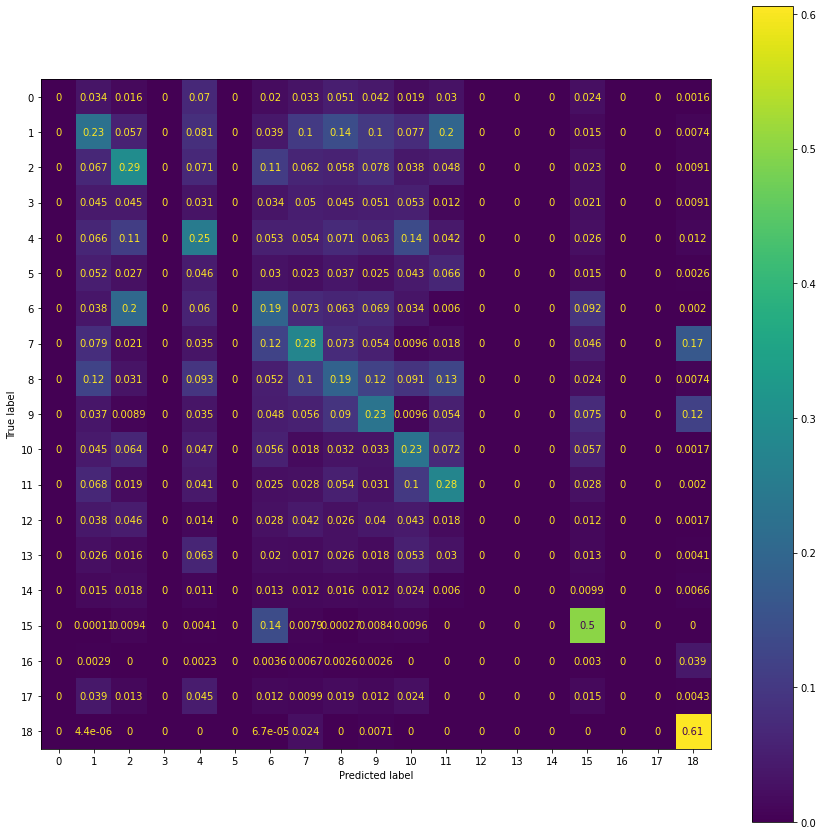

/home/ad.adasworks.com/levente.peto/aidrms/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          703     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61835D+06    |proj g|=  1.11920D+09

At iterate   50    f=  6.72818D+06    |proj g|=  2.71916D+07

At iterate  100    f=  6.66638D+06    |proj g|=  9.76971D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  703    100    110      1     0     0   9.770D+06   6.666D+06
  F =   6666381.5706495782     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [5]:
ric = RidgeClassifier(max_iter=10000,
                     random_state=42,
                     #class_weight="balanced",
                     tol=1e-3).fit(X_train, y_train)
print(ric.score(X_train, y_train))
print(ric.score(X_test, y_test))
plot_cm(ric, X_test, y_test)